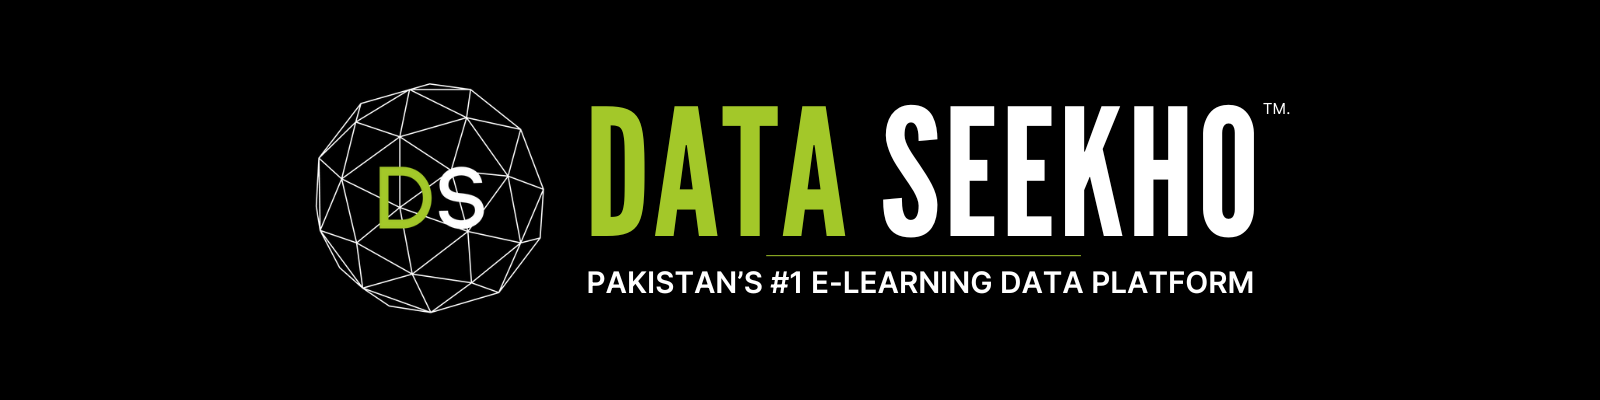

# Hi, I'm Muneer Ahmed Quadri 👋

Welcome to my GitHub profile! I'm currently a **Machine Learning Bootcamp Fellow** at [Data Seekho](https://dataseekho.com), where I'm honing my expertise in machine learning, data science, and artificial intelligence. I am driven by a passion for solving real-world challenges through data-driven solutions and am committed to deepening my knowledge and skills in this dynamic field.


---

## 🌟 About Me
- 🎓 **Education**: Bachelor’s in Computer Science from UIT University.
- 💻 **Skills**: Python, SQL, Machine Learning, Data Visualization, Pandas, NumPy, Scikit-Learn, TensorFlow, Matplotlib, Seaborn
- 🌱 **Currently Learning**: Python, Data Analytics, and Advanced Data Science techniques
- 🤝 **Looking to collaborate on**: Open-source data science projects and machine learning competitions
- 🔭 **Research Interests**: Data Science, AI Ethics, Predictive Modeling, Generative AI
- 📫 **How to reach me**: quadrimuneerahmed@gmail.com | www.linkedin.com/in/muneer-ahmed-quadri

# **Part 1: Data Scraping (Data Collection using OpenWeather API)**


### 1. Import Libraries

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import requests
from datetime import datetime

### 2. Use the OpenWeather API to collect real-time weather data for cities in Pakistan.

In [103]:
cities = pd.read_csv('pakistan_cities.csv') 
cities.tail()

,City,Province,Country
142,Nasirabad,Balochistan,Pakistan
143,Tump,Balochistan,Pakistan
144,Kahan,Balochistan,Pakistan
145,Shahdadkot,Balochistan,Pakistan
146,Ormara,Balochistan,Pakistan


In [37]:
import requests
import pandas as pd
from datetime import datetime

# Your API key
api_key = '----put-your-api-key-----'

# Define an empty list to store the results
weather_data = []

# Loop through each city and its corresponding country in the DataFrame
for index, row in cities.iterrows():
    city = row['City']
    country = row['Country']  # Get the country from your CSV
    province = row['Province']
    # Construct the API request URL
    url = f'http://api.openweathermap.org/data/2.5/weather?q={city}&appid={api_key}&units=metric'

    # Make the request to the API
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        data = response.json()  # Convert response to JSON format

        # Extract weather data
        temp = data['main']['temp']
        feels_like = data['main']['feels_like']
        temp_min = data['main']['temp_min']
        temp_max = data['main']['temp_max']
        humidity = data['main']['humidity']
        pressure = data['main']['pressure']
        wind_speed = data['wind']['speed']
        desc = data['weather'][0]['description']
        #country = data['sys']['country']
        clouds = data['clouds']['all']
        lon = data['coord']['lon']
        lat = data['coord']['lat']
        sunrise_unix = data['sys']['sunrise']
        sunset_unix = data['sys']['sunset']

        # Convert Unix timestamps to human-readable format
        sunrise = datetime.fromtimestamp(sunrise_unix).strftime('%I:%M %p')
        sunset = datetime.fromtimestamp(sunset_unix).strftime('%I:%M %p')

        # Append the data to the list
        weather_data.append({
            'Country': country,
            'Province':province,
            'City': city,
            'Temperature': temp,
            'Feels_Like': feels_like,
            'Min_Temp': temp_min,
            'Max_Temp': temp_max,
            'Humidity': humidity,
            'Pressure': pressure,
            'Wind_Speed': wind_speed,
            'Cloudiness': clouds,
            'Description': desc.capitalize(),
            'Longitude': lon,
            'Latitude': lat,
            'Sunrise': sunrise,
            'Sunset': sunset
        })

    else:
        # If the request fails, append an error message for that city
        weather_data.append({
            'City': city,
            'Error': f'Error fetching data: {response.status_code}'
        })

# Convert the list of weather data into a pandas DataFrame
weather_df = pd.DataFrame(weather_data)

### 3. Save the DataFrame to a CSV file

In [38]:

#weather_df.to_csv('pakistan_weather_data.csv', index=False)
# Print the DataFrame
#print(weather_df)
#weather_df.head()

# **Part 2: Data Exploration**
### 1. Load the Dataset and Inspect the First Few Rows


In [106]:
# Load the dataset (replace 'weather_data.csv' with your file path)
df = pd.read_csv('pakistan_weather_data.csv')
# Display the first few rows of the dataset
df.head(10)

,Unnamed: 0,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset,Error
0,0,Pakistan,Sindh,Karachi,31.90,36.26,31.90,31.90,58.0,1001.0,6.17,75.0,Broken clouds,67.0822,24.9056,01:16 AM,01:41 PM,NaN
1,1,Pakistan,Sindh,Hyderabad,29.23,32.29,28.73,29.23,65.0,1002.0,6.17,40.0,Haze,78.4744,17.3753,12:33 AM,12:52 PM,NaN
2,2,Pakistan,Sindh,Sukkur,39.81,40.41,39.81,39.81,24.0,999.0,3.95,0.0,Clear sky,68.8574,27.7052,01:07 AM,01:35 PM,NaN
3,3,Pakistan,Sindh,Larkana,39.93,41.35,39.93,39.93,26.0,998.0,2.90,0.0,Clear sky,68.2141,27.5551,01:10 AM,01:38 PM,NaN
4,4,NaN,NaN,Mirpurkhas,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Error fetching data: 404
5,5,Pakistan,Sindh,Nawabshah,38.70,41.07,38.70,38.70,31.0,998.0,4.71,1.0,Clear sky,68.4096,26.2483,01:10 AM,01:36 PM,NaN
6,6,Pakistan,Sindh,Jacobabad,39.66,40.52,39.66,39.66,25.0,998.0,2.22,0.0,Clear sky,68.4388,28.2810,01:09 AM,01:37 PM,NaN
7,7,Pakistan,Sindh,Dadu,40.68,42.24,40.68,40.68,25.0,998.0,1.79,0.0,Clear sky,67.7763,26.7329,01:12 AM,01:39 PM,NaN
8,8,Pakistan,Sindh,Thatta,32.94,36.46,32.94,32.94,51.0,1001.0,7.24,9.0,Clear sky,67.9235,24.7475,01:12 AM,01:38 PM,NaN
9,9,Pakistan,Sindh,Badin,34.75,37.98,34.75,34.75,44.0,1000.0,5.67,5.0,Clear sky,68.8384,24.6560,01:09 AM,01:34 PM,NaN


### 2. Check the Structure of the Dataset


In [107]:
# Check the data types and missing values in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   147 non-null    int64  
 1   Country      121 non-null    object 
 2   Province     121 non-null    object 
 3   City         147 non-null    object 
 4   Temperature  121 non-null    float64
 5   Feels_Like   121 non-null    float64
 6   Min_Temp     121 non-null    float64
 7   Max_Temp     121 non-null    float64
 8   Humidity     121 non-null    float64
 9   Pressure     121 non-null    float64
 10  Wind_Speed   121 non-null    float64
 11  Cloudiness   121 non-null    float64
 12  Description  121 non-null    object 
 13  Longitude    121 non-null    float64
 14  Latitude     121 non-null    float64
 15  Sunrise      121 non-null    object 
 16  Sunset       121 non-null    object 
 17  Error        26 non-null     object 
dtypes: float64(10), int64(1), object(7)
memory usage: 

### 3. Summary Statistics for Numerical Columns





In [108]:
# Get summary statistics for numerical columns (Temperature, Humidity, etc.)
df.describe()

,Unnamed: 0,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Longitude,Latitude
count,147.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.000000,121.00000,121.000000,121.000000
mean,73.000000,34.771405,36.048843,34.762562,34.781240,34.479339,1001.033058,3.564959,12.22314,68.753469,29.888118
std,42.579338,5.740646,6.496661,5.761689,5.706807,18.203525,3.919893,1.835675,27.18501,12.616513,5.117664
min,0.000000,11.680000,9.690000,11.680000,11.680000,6.000000,997.000000,0.350000,0.00000,-9.569000,8.518500
25%,36.500000,31.900000,31.820000,31.900000,31.900000,25.000000,999.000000,2.250000,0.00000,68.223100,27.529500
50%,73.000000,36.070000,38.960000,36.070000,36.070000,30.000000,1000.000000,3.280000,0.00000,70.634800,30.300000
75%,109.500000,39.450000,40.520000,39.450000,39.450000,41.000000,1002.000000,4.540000,3.00000,72.934100,32.161700
max,146.000000,41.700000,43.750000,41.700000,41.700000,99.000000,1018.000000,12.190000,100.00000,117.789200,51.445000


### 4. Check for Unique Values in Categorical Columns





In [109]:
# Unique values in 'City' column
df['City'].unique()

array(['Karachi', 'Hyderabad', 'Sukkur', 'Larkana', 'Mirpurkhas',
       'Nawabshah', 'Jacobabad', 'Dadu', 'Thatta', 'Badin', 'Shikarpur',
       'Khairpur', 'Tando Adam', 'Tando Allahyar', 'Sanghar', 'Umerkot',
       'Jamshoro', 'Matiari', 'Ghotki', 'Qambar', 'Shahdadkot',
       'Tharparkar', 'Hala', 'Naushahro Feroze', 'Samaro', 'Chachro',
       'Pano Aqil', 'Pithoro', 'Pir Jo Goth', 'Kotri', 'Mirpur Bathoro',
       'Daro', 'Daur', 'Kandiaro', 'Shahpur Chakar', 'Lakha', 'Sann',
       'Khipro', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Multan',
       'Gujranwala', 'Sialkot', 'Bahawalpur', 'Rahim Yar Khan',
       'Sargodha', 'Sheikhupura', 'Jhang', 'Kasur', 'Okara', 'Sahiwal',
       'Dera Ghazi Khan', 'Toba Tek Singh', 'Chiniot', 'Narowal',
       'Jehlum', 'Mianwali', 'Khushab', 'Layyah', 'Bhakkar', 'Hafizabad',
       'Muridke', 'Jaranwala', 'Pattoki', 'Arifwala', 'Burewala',
       'Pakpattan', 'Kahror Pakka', 'Kot Addu', 'Depalpur', 'Samundri',
       'Jalalpur Bhattian', 'Kha

In [110]:
# Unique weather descriptions
df['Description'].value_counts()

,count
Description,
Clear sky,98
Overcast clouds,7
Scattered clouds,5
Broken clouds,3
Haze,3
Few clouds,2
Smoke,2
Light rain,1


# **Part 3: Data Cleaning**




### Step 1: Delete Unnecessary Columns and Null/Error Rows




In [111]:
# Drop columns 'unnamed: 0' and 'error'
df.drop(columns=['Unnamed: 0', 'Error'], inplace=True)



### Step 2: Handle Missing or Erroneous Data

In [112]:
# Check for missing values
print(df.isnull().sum())

# Fill missing numerical values with the column mean (optional)
#df.fillna(df.mean(), inplace=True)
# Drop rows with any null values in the dataset
df.dropna(inplace=True)


Country        26
Province       26
City            0
Temperature    26
Feels_Like     26
Min_Temp       26
Max_Temp       26
Humidity       26
Pressure       26
Wind_Speed     26
Cloudiness     26
Description    26
Longitude      26
Latitude       26
Sunrise        26
Sunset         26
dtype: int64


In [113]:
df.head()

,Country,Province,City,Temperature,Feels_Like,Min_Temp,Max_Temp,Humidity,Pressure,Wind_Speed,Cloudiness,Description,Longitude,Latitude,Sunrise,Sunset
0,Pakistan,Sindh,Karachi,31.90,36.26,31.90,31.90,58.0,1001.0,6.17,75.0,Broken clouds,67.0822,24.9056,01:16 AM,01:41 PM
1,Pakistan,Sindh,Hyderabad,29.23,32.29,28.73,29.23,65.0,1002.0,6.17,40.0,Haze,78.4744,17.3753,12:33 AM,12:52 PM
2,Pakistan,Sindh,Sukkur,39.81,40.41,39.81,39.81,24.0,999.0,3.95,0.0,Clear sky,68.8574,27.7052,01:07 AM,01:35 PM
3,Pakistan,Sindh,Larkana,39.93,41.35,39.93,39.93,26.0,998.0,2.90,0.0,Clear sky,68.2141,27.5551,01:10 AM,01:38 PM
5,Pakistan,Sindh,Nawabshah,38.70,41.07,38.70,38.70,31.0,998.0,4.71,1.0,Clear sky,68.4096,26.2483,01:10 AM,01:36 PM


### Step 3: Normalize Column Names

In [114]:
# Normalize column names (lowercase and replace spaces with underscores)
df.columns = df.columns.str.lower()

In [115]:
df.columns

Index(['country', 'province', 'city', 'temperature', 'feels_like', 'min_temp',
       'max_temp', 'humidity', 'pressure', 'wind_speed', 'cloudiness',
       'description', 'longitude', 'latitude', 'sunrise', 'sunset'],
      dtype='object')

### Step 4: Remove Duplicate Rows


In [116]:
# Remove duplicate rows
df.drop_duplicates(inplace=True)

### Step 5: Convert Columns to Appropriate Data Types





In [117]:
# Convert 'Sunrise' and 'Sunset' to datetime format
df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')

<ipython-input-117-d8a851ab3e95>:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunrise'] = pd.to_datetime(df['sunrise'], errors='coerce')
<ipython-input-117-d8a851ab3e95>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['sunset'] = pd.to_datetime(df['sunset'], errors='coerce')


In [118]:
df.head()

,country,province,city,temperature,feels_like,min_temp,max_temp,humidity,pressure,wind_speed,cloudiness,description,longitude,latitude,sunrise,sunset
0,Pakistan,Sindh,Karachi,31.90,36.26,31.90,31.90,58.0,1001.0,6.17,75.0,Broken clouds,67.0822,24.9056,2024-09-10 01:16:00,2024-09-10 13:41:00
1,Pakistan,Sindh,Hyderabad,29.23,32.29,28.73,29.23,65.0,1002.0,6.17,40.0,Haze,78.4744,17.3753,2024-09-10 00:33:00,2024-09-10 12:52:00
2,Pakistan,Sindh,Sukkur,39.81,40.41,39.81,39.81,24.0,999.0,3.95,0.0,Clear sky,68.8574,27.7052,2024-09-10 01:07:00,2024-09-10 13:35:00
3,Pakistan,Sindh,Larkana,39.93,41.35,39.93,39.93,26.0,998.0,2.90,0.0,Clear sky,68.2141,27.5551,2024-09-10 01:10:00,2024-09-10 13:38:00
5,Pakistan,Sindh,Nawabshah,38.70,41.07,38.70,38.70,31.0,998.0,4.71,1.0,Clear sky,68.4096,26.2483,2024-09-10 01:10:00,2024-09-10 13:36:00


# Part (4,5): **EDA + Data Visualization**

### 1. Analyze the Distribution of Numerical Variables


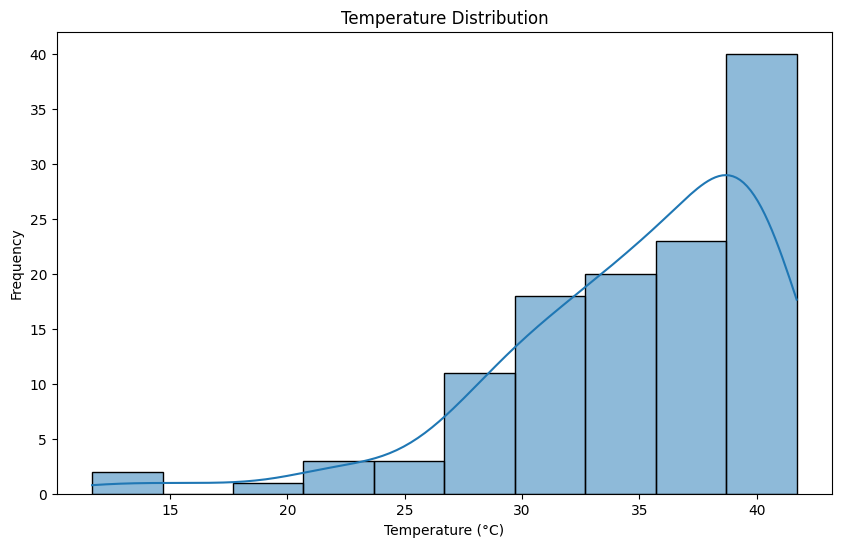

In [119]:
# Use histograms and boxplots to understand the distribution of variables like Temperature, Humidity, etc.

import seaborn as sns
import matplotlib.pyplot as plt

# Histogram for Temperature
plt.figure(figsize=(10, 6))
sns.histplot(df['temperature'], kde=True)
plt.title('Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Frequency')
plt.show()



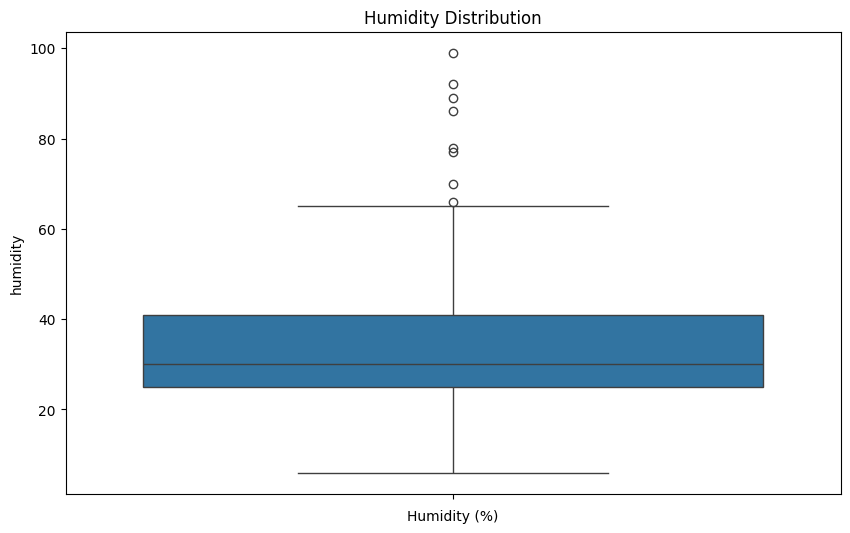

In [120]:
# Boxplot for Humidity
plt.figure(figsize=(10, 6))
sns.boxplot(df['humidity'])
plt.title('Humidity Distribution')
plt.xlabel('Humidity (%)')
plt.show()


### 2. Group and Compare Cities Based on Weather Conditions



In [124]:
# Group by City and Province, and calculate the mean for relevant columns
city_province_group = df.groupby(['province', 'city']).agg({
    'temperature': 'mean',
    'humidity': 'mean',
    'wind_speed': 'mean',
    'cloudiness': 'mean'
}).reset_index()


# Display the grouped DataFrame
print(city_province_group)

        province            city  temperature  humidity  wind_speed  \
0    Balochistan          Awaran        38.74       6.0        6.78   
1    Balochistan         Barkhan        32.11      24.0        3.77   
2    Balochistan            Bela        32.64      61.0        5.51   
3    Balochistan          Chaman        29.46      11.0        4.11   
4    Balochistan       Dalbandin        33.96       6.0        1.55   
..           ...             ...          ...       ...         ...   
116        Sindh          Sukkur        39.81      24.0        3.95   
117        Sindh      Tando Adam        36.92      37.0        5.90   
118        Sindh  Tando Allahyar        36.51      38.0        5.47   
119        Sindh          Thatta        32.94      51.0        7.24   
120        Sindh         Umerkot        23.89      92.0        7.31   

     cloudiness  
0           1.0  
1           0.0  
2          95.0  
3           0.0  
4           0.0  
..          ...  
116         0.0  
117

In [126]:
# Sort by average temperature in descending order
top_cities = city_province_group.sort_values(by='temperature', ascending=False).head(20)

# Display the top 10 cities
print(top_cities)

        province               city  temperature  humidity  wind_speed  \
59        Punjab    Dera Ghazi Khan        41.70      20.0        2.10   
68        Punjab           Khanewal        41.61      20.0        3.28   
70        Punjab           Kot Addu        41.51      21.0        3.05   
66        Punjab       Kahror Pakka        41.23      18.0        2.33   
72        Punjab             Layyah        41.19      22.0        3.00   
87        Punjab     Toba Tek Singh        40.99      24.0        0.35   
54        Punjab         Bahawalpur        40.79      21.0        1.98   
89         Sindh               Dadu        40.68      25.0        1.79   
82        Punjab           Samundri        40.46      24.0        4.74   
97         Sindh           Kandiaro        40.38      23.0        3.10   
113        Sindh         Shahdadkot        40.30      27.0        2.44   
109        Sindh             Qambar        40.30      27.0        2.54   
25   Balochistan         Shahdadkot   

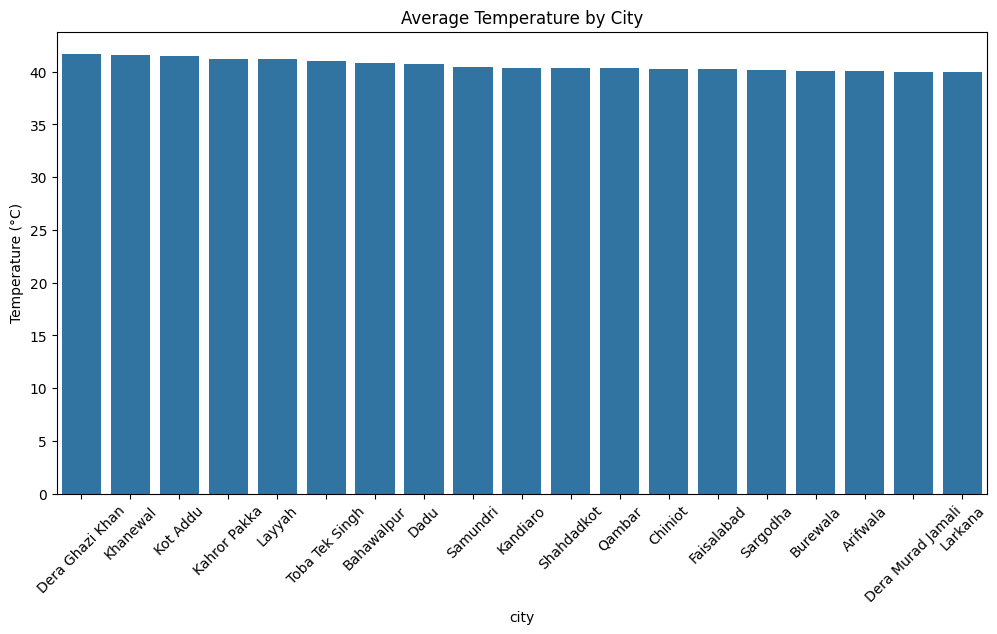

In [127]:
# Barplot for Average Temperature by City
plt.figure(figsize=(12, 6))
sns.barplot(x='city', y='temperature', data=top_cities)
plt.title('Average Temperature by City')
plt.xticks(rotation=45)
plt.ylabel('Temperature (°C)')
plt.show()

### 5. Scatter Plot for Temperature vs Humidity



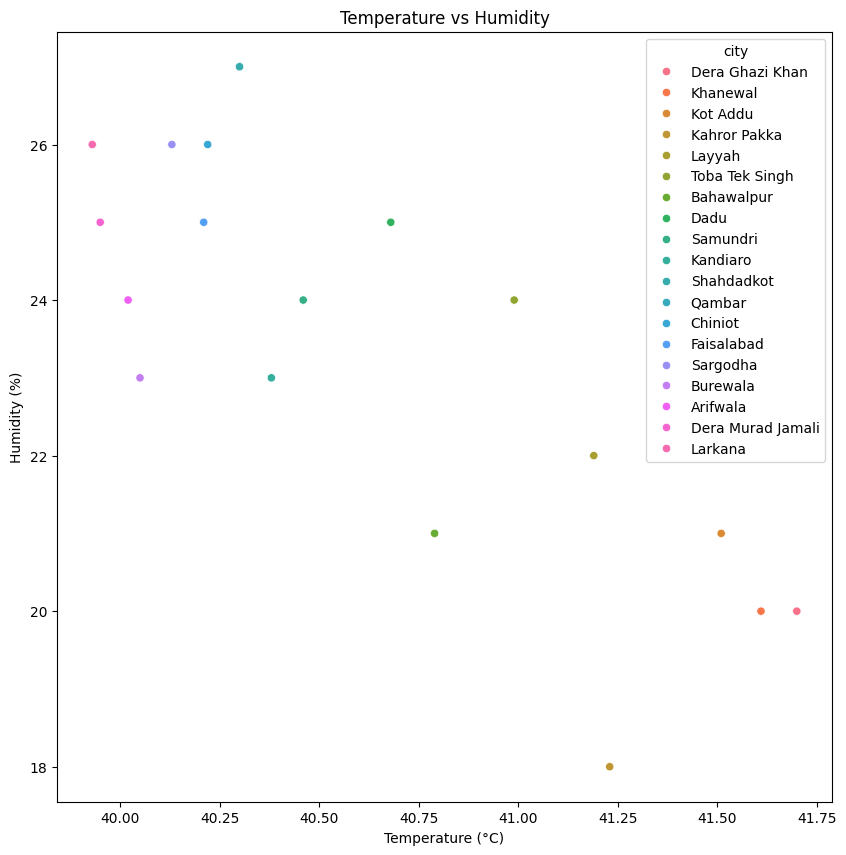

In [128]:
# Visualize the relationship between temperature and humidity to see if there is a pattern.

# Scatterplot for Temperature vs Humidity
plt.figure(figsize=(10, 10))
sns.scatterplot(x='temperature', y='humidity', data=top_cities, hue='city')
plt.title('Temperature vs Humidity')
plt.xlabel('Temperature (°C)')
plt.ylabel('Humidity (%)')
plt.show()

### 6. Investigate Weather Description by City



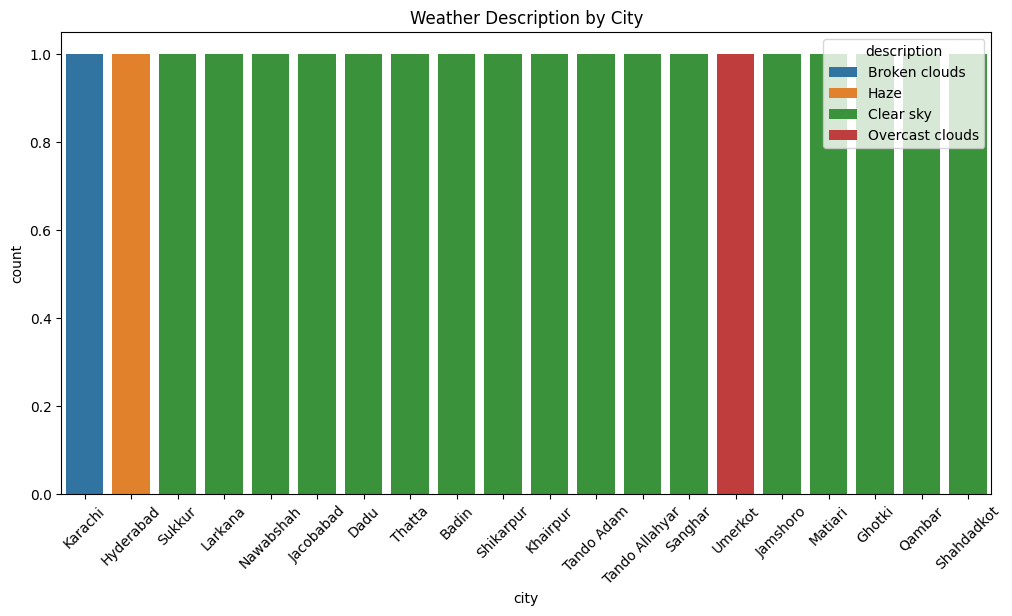

In [129]:
# Explore the weather descriptions in different cities to identify any common patterns.

# Count plot for weather descriptions by city
plt.figure(figsize=(12, 6))
sns.countplot(x='city', hue='description', data=df.head(20))
plt.title('Weather Description by City')
plt.xticks(rotation=45)
plt.show()